## Question 1

1. It is assumed that in Singapore, the proportion of people who prefer Coke over Pepsi among the overall population is p=0.4. We are doing a survey on 20 randomly selected people, and what is the probability that at least 10 of them prefer Coke? (Ans: C)

    A. 
```python
####################
from scipy.stats import binom
1 - binom.ppf(9, 20, 0.4)
####################
```

    B.
```python
####################
from scipy.stats import binom
binom.cdf(10, 20, 0.4)
####################
```

    C.
```python
####################
from scipy.stats import binom
1 - binom.cdf(9, 20, 0.4)
####################
```

    D.
```python
####################
from scipy.stats import binom
binom.ppf(10, 20, 0.4)
####################
```

**Solution:**

In [1]:
from scipy.stats import binom
1 - binom.cdf(9, 20, 0.4)

0.2446627966836068

2. In the Pepsi and Coke case, suppose that the population proportion of people preferring Coke is $p$. Let variable $X_i$ be the choice of the $i$th person interviewed, where $X_i=1$ if this person selects Coke, and $X_i=0$ otherwise. For a sample of only two independent interviews $X_1$ and $X_2$, what is the variance of $X_1+X_1-X_2$? (Ans: C)


    A. $p(1-p)$
    
    B. $3p(1-p)$
    
    C. $5p(1-p)$
    
    D. $9p(1-p)$
    
**Solution:**

$$
\begin{align}
&\text{Var}\left(X_1+X_1-X_2\right) \\
&= \text{Var}\left(2X_1-X_2\right) \\
&= \text{Var}\left(2X_1\right)+\text{Var}\left(X_2\right) \\
&= 4\text{Var}\left(X_1\right)+\text{Var}\left(X_2\right) \\
&= 4p(1-p) + p(1-p) \\
&= 5p(1-p)
\end{align}
$$

---

## Question 2

The table below shows the joint probability for the number of credit cards owned by card holders ($X$) and the number of credit card purchases made in a week by them ($Y$).

|| $$Y=0$$ | $$Y=1$$ | $$Y=2$$ | $$Y=3$$ | $$Y=4$$ |
|---:|---:|---:|----:|---:|----:|
|$X=1$|0.08 |0.13|0.09|0.06|0.03|
|$X=2$|0.03 |0.08|0.08|0.09|0.07|
|$X=3$|0.01 |0.03|0.06|0.08|0.08|

The joint distribution is also given as the two-dimensional array below.

In [2]:
import numpy as np

distr = np.array([[0.08, 0.13, 0.09, 0.06, 0.03],
                  [0.03, 0.08, 0.08, 0.09, 0.07],
                  [0.01, 0.03, 0.06, 0.08, 0.08]])
distr

array([[0.08, 0.13, 0.09, 0.06, 0.03],
       [0.03, 0.08, 0.08, 0.09, 0.07],
       [0.01, 0.03, 0.06, 0.08, 0.08]])

1. What is the mean number of cards held by a person from this group?

**Solution**:

In [3]:
prob_cards = distr.sum(axis=1)
prob_cards

array([0.39, 0.35, 0.26])

In [6]:
num_cards = np.arange(1, 4)
num_cards

array([1, 2, 3])

In [8]:
mean_cards = (prob_cards * num_cards).sum()
mean_cards

1.87

2. What is the variance of the number of purchases made by a person from this group?

**Solution**:

In [9]:
prob_purc = distr.sum(axis=0)
prob_purc

array([0.12, 0.24, 0.23, 0.23, 0.18])

In [10]:
values_purc = np.arange(5)
values_purc

array([0, 1, 2, 3, 4])

In [11]:
mean_purc = (prob_purc * values_purc).sum()
mean_purc

2.11

In [12]:
(prob_purc * (values_purc - mean_purc)**2).sum()

1.6579

3. What is the probability that a person made at least three purchases in this week?

**Solution**:

In [9]:
prob_purc = distr.sum(axis=0)
prob_purc

array([0.12, 0.24, 0.23, 0.23, 0.18])

In [10]:
prob_purc[-2:].sum()

0.41

---

## Question 3

For investors, stocks are risky but they generate high returns. Bonds are safer but they offer proportionally less returns. It is thus preferred to combine these asset classes in a portfolio to achieve a better trade off between mean returns and risks. Particularly, in cases where the stocks and bonds are negatively correlated, combining these assets in a portfolio can actually increase returns without increasing risk. 

Suppose that the means and standard deviations of the return rates of bonds and stocks, together with the covariance between the bond and stock returns, are given in the following code cell.

In [1]:
mean_s = 0.0819         # Mean of the stock return
std_s = 0.1791          # Standard deviation of the stock return

mean_b = 0.0490         # Mean of the bonds return
std_b = 0.0416          # Standard deviation of the bonds return

cov = -0.00244          # Covariance between the bonds and stocks return

1. The classic [60/40 portfolio](https://portfoliocharts.com/portfolio/classic-60-40/) allocates $60\%$ of the budget in stocks and $40\%$ in bonds. It is usually served as a benchmark when analyzing other investment strategies. Use the mean values, standard deviations, and covariance given above to calculate the mean return and standard deviation of the 60/40 portfolio.

**Solution**:

In [2]:
mean_p = 0.6*mean_s + 0.4*mean_b                            # Mean of the portfolio return

var_p = 0.6**2*std_s**2 + 0.4**2*std_b**2 + 2*0.6*0.4*cov   # Variance of the portfolio return
std_p = var_p ** 0.5                                        # STD of the portfolio return

print(f"Mean return of the portfolio: {mean_p}")
print(f"Standard deviation of the portfolio return: {std_p}")

Mean return of the portfolio: 0.06874
Standard deviation of the portfolio return: 0.10321502410017644


2. Let $x$ be the percentage of investment in stocks, which can be changed between $0$ and $100\%$ inclusive. Show the trade-off between the mean returns and standard deviations of the portfolio on the y-aixs and x-axis respectively. You may refer to [Historical Risk versus Return of Stocks and Bonds](https://engineeredportfolio.com/2016/08/05/historical-risk-return-of-stocks-bonds/) for the digram of showing the trade-off.

**Solution**:

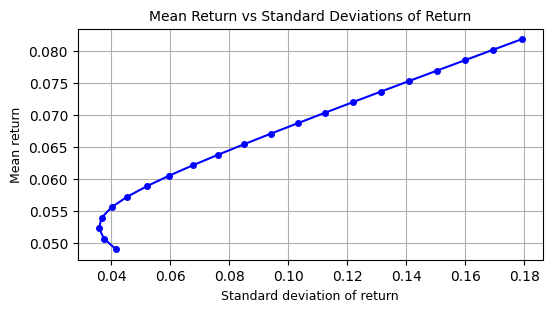

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1.05, 0.05)

mean_p = x*mean_s + (1-x)*mean_b
var_p = x**2*std_s**2 + (1-x)**2*std_b**2 + 2*x*(1-x)*cov
std_p = var_p ** 0.5

plt.figure(figsize=(6,3))
plt.plot(std_p, mean_p, marker='o', markersize=4, color='b')
plt.title("Mean Return vs Standard Deviations of Return", fontsize=10)
plt.xlabel("Standard deviation of return", fontsize=9)
plt.ylabel("Mean return", fontsize=9)
plt.grid()
plt.show()

3. Alternatively, the risk can be expressed as the probability that the return is worse than a given value, such as 0.01, 0, -0.01, -0.05 or -0.1. Visualize the trade-off between the mean returns and the new risk measure on the y-aixs and x-axis respectively, assuming that the returns of stocks and bonds both follow normal distributions.

**Solution**:

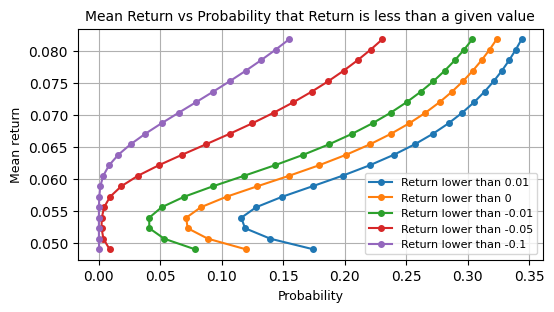

In [9]:
from scipy.stats import norm

thresholds = [0.01, 0, -0.01, -0.05, -0.1]

plt.figure(figsize=(6,3))
for r in thresholds:
    pr = norm.cdf(r, mean_p, std_p)
    plt.plot(pr, mean_p, marker='o', markersize=4, label=f'Return lower than {r}')

plt.title("Mean Return vs Probability that Return is less than a given value", fontsize=10)
plt.xlabel("Probability", fontsize=9)
plt.ylabel("Mean return", fontsize=9)
plt.legend(fontsize=8)
plt.grid()
plt.show()